<a href="https://colab.research.google.com/github/indrack/Proyecto-INF-354/blob/main/ProyectoTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

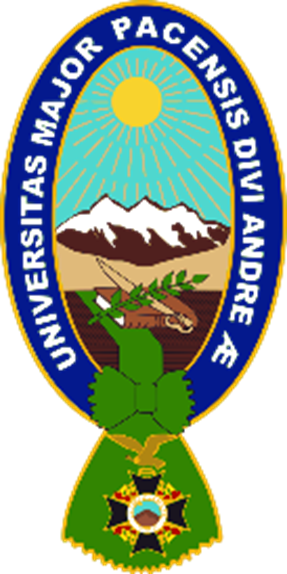

# **Proyecto:** "Calidad de Vinos Blancos"

# **Materia:** INF-354 Inteligencia Artificial

# **Univ.:** Vega Pacheco Indrack Asvins

# **Docente:** Lic. Moises Silva

# **Año:** 2020 


Estos Datos pertenecen a UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Wine+Quality), cuenta con 2 Datas Set, yo tome la de vinos blancos,  clasifiqué las calidades del vino en 3 categorías: buenas, media o estándar y malas.

 Luego, exploré los nuevos datos con bibliotecas de visualización de datos para tratar de entender que rera un buen o mal vino, ya que no soy un experto en el campo. 

Para la predicción utilicé los modelos K-Neighbors, Support Vector Machine,  Random Forest y Stochastic Gradient Decent. 

Para concluir, comparé las puntuaciones de precisión de acuerdo con las razones de predicción del modeloy unos Splits de pruebas como fue solicitado. 


# •	Data Set

Para obtener más información, lea [Cortez et al., 2009].

Variables de entrada (basadas en pruebas fisicoquímicas):

1 - acidez fija (fixed acidity)

2 - acidez volátil (volatile acidity)

3 - ácido cítrico (citric acid)

4 - azúcar residual (residual sugar)

5 - cloruros (chlorides)

6 - dióxido de azufre libre (free sulfur dioxide)

7 - dióxido de azufre total (total sulfur dioxide)

8 - densidad (density)

9 - pH (pH)

10 - sulfatos (sulphates)

11 - alcohol (alcohol)

Variable de salida (basada en datos sensoriales):

12 – calidad (quality) --- puntuación entre 0 y 10---


# ////////////////////////////////////////////////////////////////////////////////

Importacion de las librerias generales a usar y de nuestro Data set

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

df = pd.read_csv("winequality-white_v2.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Aqui apreciamos los primeros 10 valores de nuestro data set tal cual como lo importamos

In [2]:
#Informacion sobre los datos de las colummnas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Preprocesado de los datos para para el MachineLearning e informacion mas clara


In [46]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

aplicamos una busqueda de valores perdidos o inexistentes (NaN) es en nuestro atributos, nos dio como resultado 0 lo cual es perfecto para continuar

In [3]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Malos")
    elif num>6:
        category.append("Buenos")
    else:
        category.append("Regular o Estandar")

#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

data.head(10)                

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Regular o Estandar
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Regular o Estandar
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Regular o Estandar
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Regular o Estandar
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Regular o Estandar
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Regular o Estandar
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Regular o Estandar
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Regular o Estandar
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Regular o Estandar
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,Regular o Estandar


Ahora clasificamos nuestro Data set, como habiamos planeano en 3 categorias por "cadenas" (Bueno, regular o estandar y malo), desaciendonos de la categorizacion por numeros del 0 al 10

# --------------------------Graficas de comprension de nuestros datos-----------------------------

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Regular o Estandar    3655
Buenos                1060
Malos                  183
Name: category, dtype: int64

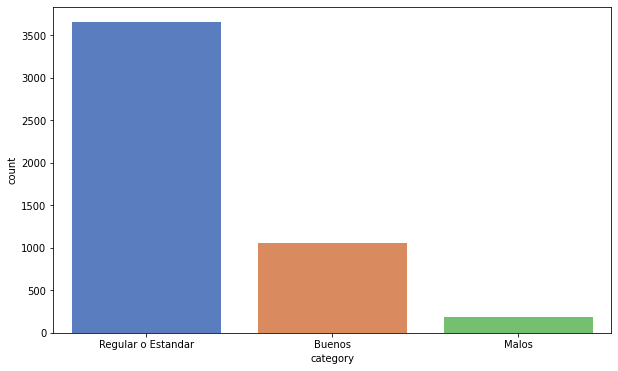

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

En la anterior grafica apreciamos como esta distribuido nuestros vinos

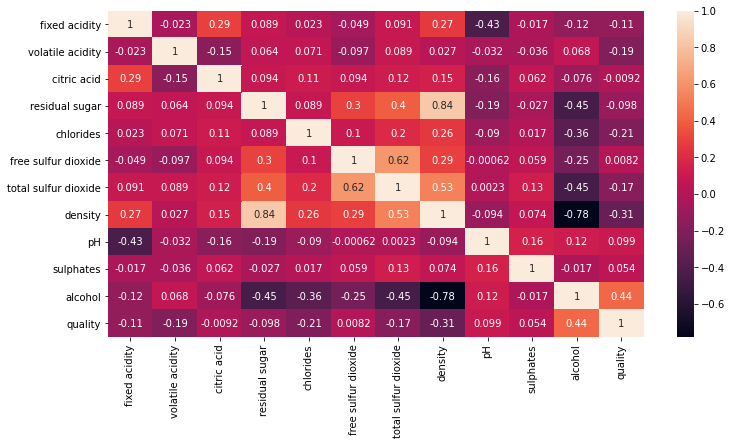

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Según el mapa de calor (heatmap), podemos centrarnos en las relaciones alcohol-calidad y densidad-alcohol para obtener una exploración significativa

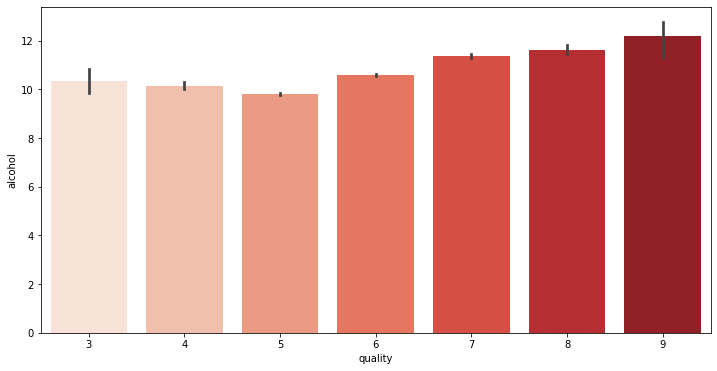

In [6]:
#El nivel del alcoholmientras mas alto hace que la calidad del vino aumente
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Reds")

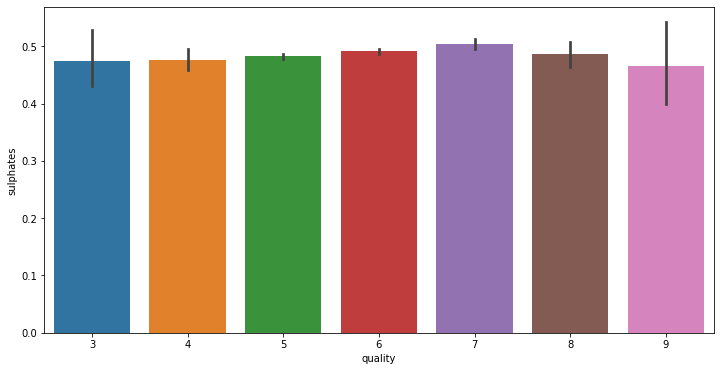

In [7]:
#Los Sulphates no tienes una relevancia marcable en la calidad
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

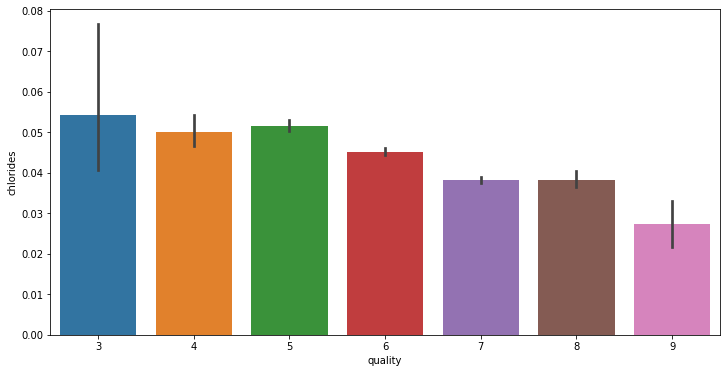

In [8]:
#Aqui vemos como los "cloruros" caen y la calidad se eleva
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

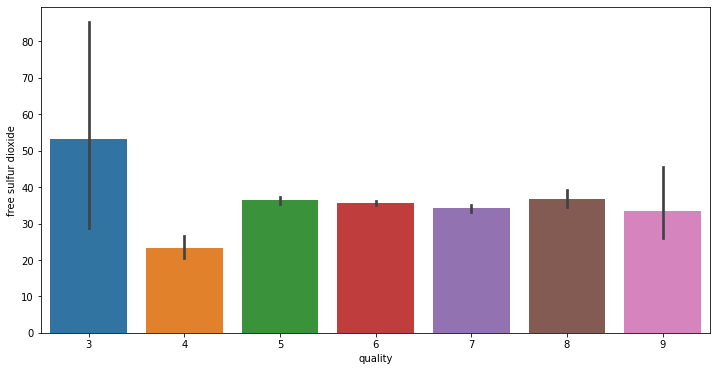

In [9]:
#Aqui solo podemos decir que para una buena calidad el nivel de "dióxido de azufre libre " debe estar 35 y 40 aproximadamente
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

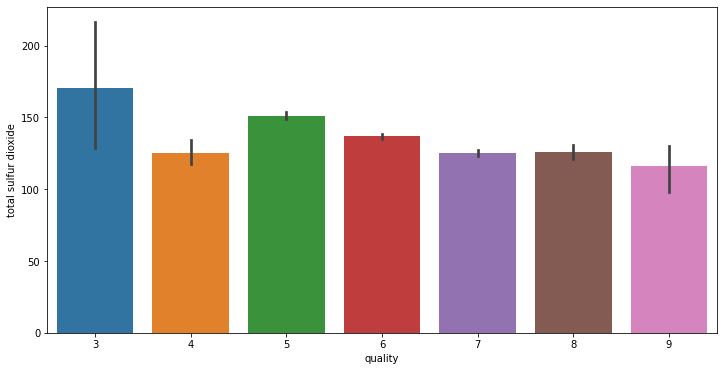

In [10]:
#Se puede apreciar como levemente a excepcion de calida#5 dismuye el "dióxido de azufre total" y aumenta la calidad hasta nivel 9 
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

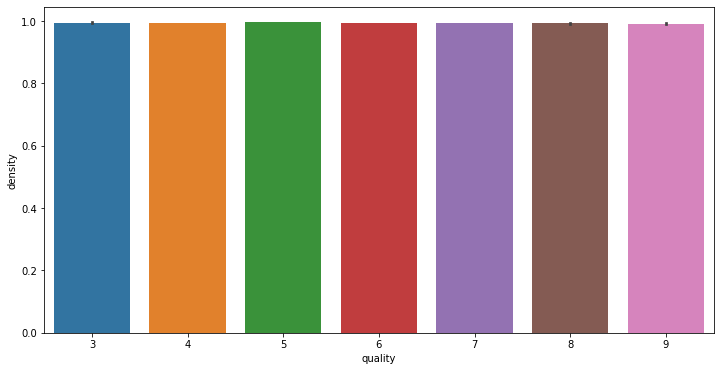

In [11]:
#Aca vemos como la densidad tiene un valor podria decirse estable en el nivel de calidad, lo cual podemos volver a ver en el pH
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'density', data = df)

<Figure size 864x432 with 0 Axes>

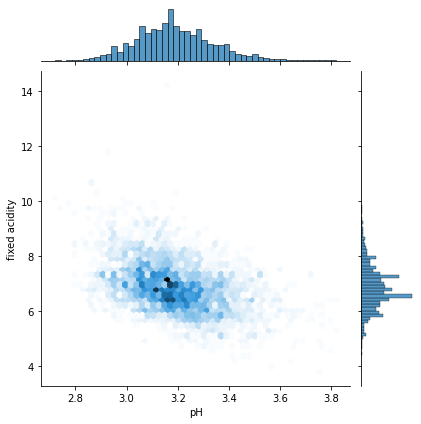

In [12]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["fixed acidity"],x=df["pH"],kind="hex")


Aqui vemos como en la grafica los datos estan disperson como podiamos deducir por las graficas anteriores

<Figure size 864x432 with 0 Axes>

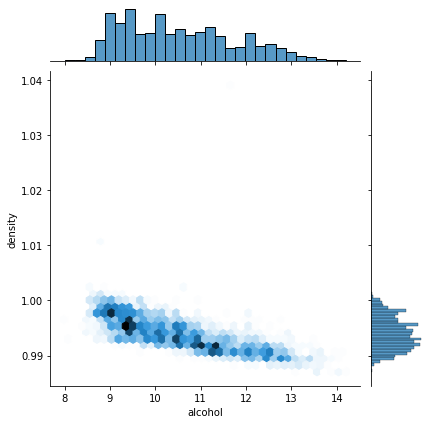

In [13]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex") 


En esta vemos como nos muestra unos dtos mucho menos dispersos con la densidad y alcohol

# ----------------------------------------------------------------------------------------------

Configuración de características, etiquetas y codificación de datos categóricos

(bueno = 1, regular = 2, malo = 3)

In [14]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

# Entrenando y Teste de los datos

Ahora que hemos explorado un poco los datos, sigamos adelante y dividamos los datos en conjuntos de entrenamiento y prueba.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

Escalamos los datos para optimizar las predicciones

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# ------------------------------------------Empezamos con los modelos de datos---------------------------------------------


Support Vector Machine (Maquinas de Vectores de Soporte)

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score

In [19]:

print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.32      0.44       216
           1       0.00      0.00      0.00        60
           2       0.77      0.96      0.85       704

    accuracy                           0.76       980
   macro avg       0.49      0.43      0.43       980
weighted avg       0.71      0.76      0.71       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#Matriz de confusion para Random Support Vector Machine
print(confusion_matrix(y_test, pred_svc))

[[ 69   0 147]
 [  0   0  60]
 [ 28   0 676]]


K-Nearest Neighbors (K-Vecionos mas Proximos)

Es un método de clasificación supervisada (Aprendizaje, estimación basada en un conjunto de entrenamiento y prototipos) que sirve para estimar la función de densidad de las predictoras x por cada clase .

Este es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento x pertenezca a la clase a partir de la información proporcionada por el conjunto de prototipos. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       216
           1       0.50      0.05      0.09        60
           2       0.80      0.89      0.84       704

    accuracy                           0.76       980
   macro avg       0.63      0.49      0.49       980
weighted avg       0.73      0.76      0.73       980



In [22]:
#Matriz de confusion para Random K-Nearest Neighbors
print(confusion_matrix(y_test, pred_knn))

[[113   0 103]
 [  6   3  51]
 [ 76   3 625]]


Random Forest Classifier (Clasificador de Bosque Aleatorio)

Cada árbol es construido usando el siguiente algoritmo:

1.   Sea N el número de casos de prueba, M es el número de variables en el clasificador.
2.   Sea m el número de variables de entrada a ser usado para determinar la decisión en un nodo dado; m debe ser mucho menor que M
3.   Elegir un conjunto de entrenamiento para este árbol y usar el resto de los casos de prueba para estimar el error.
4.   Para cada nodo del árbol, elegir aleatoriamente m variables en las cuales basar la decisión. Calcular la mejor partición del conjunto de entrenamiento a partir de las m variables.

Para la predicción un nuevo caso es empujado hacia abajo por el árbol. Luego se le asigna la etiqueta del nodo terminal donde termina. Este proceso es iterado por todos los árboles en el ensamblado, y la etiqueta que obtenga la mayor cantidad de incidencias es reportada como la predicción.




In [23]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#chequeo del procesado del modelo
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.79      0.56      0.66       216
           1       1.00      0.12      0.21        60
           2       0.82      0.95      0.88       704

    accuracy                           0.82       980
   macro avg       0.87      0.55      0.58       980
weighted avg       0.82      0.82      0.79       980



In [24]:
#Matriz de confusion para Random Forest Classifier
print(confusion_matrix(y_test, pred_rfc))

[[122   0  94]
 [  1   7  52]
 [ 32   0 672]]


Stochastic Gradient Descent Classifier (Clasificador de gradiente descendente estocástico)

Es un método iterativo para optimizar una función objetivo con propiedades de suavidad adecuadas (por ejemplo, diferenciable o subdiferenciable). Puede considerarse como una aproximación estocástica de la optimización del descenso de gradientes.

La idea básica detrás de la aproximación estocástica se remonta al algoritmo de Robbins-Monro de la década de 1950.

In [25]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.60      0.17      0.26       216
           1       0.00      0.00      0.00        60
           2       0.74      0.97      0.84       704

    accuracy                           0.73       980
   macro avg       0.45      0.38      0.37       980
weighted avg       0.66      0.73      0.66       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#Matriz de confusion para "Stochastic Gradient Decent Classifier" 
print(confusion_matrix(y_test, pred_sgd))

[[ 36   0 180]
 [  1   0  59]
 [ 23   0 681]]


----------------------------Mejoramiento de nuestras precisiones------------------------------------------------------

Asignamos parametros de busqueda a nuestra "support vector machine"

In [27]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.76      0.48      0.59       216
           1       1.00      0.07      0.12        60
           2       0.80      0.95      0.87       704

    accuracy                           0.80       980
   macro avg       0.85      0.50      0.53       980
weighted avg       0.80      0.80      0.76       980



Logramos subir nuestro SVC de 76% a 80%

Cross Validation Score for random forest and Stochastic Gradient Decent

In [28]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8522208883553422

Logramos subir nuestro RFC de 82% a 85%

In [29]:
#Now lets try to do some evaluation for random forest model using cross validation.
sgd_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
sgd_eval.mean()

0.7626363588913827

Logramos subir nuestro SGD de 72% a 76%

# -----------------------------------Splits---------------------------------------

Datos en "X"

In [30]:
print("Este es X:",'\n',X)


Este es X: 
 [[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


Datos en "Y"

In [31]:
print("Este es Y:",'\n',y)

Este es Y: 
 [2 2 2 ... 2 0 2]


Creacion del Split general

In [32]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score 



Split de Support Vector Machine

In [33]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
iter_for_prediction = cv.split(X, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)

    sk_clasificador = {'support vector machine':svc}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, X, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)

0
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) [0.74612245]
1
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) [0.74612245]
2
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) [0.74612245]
3
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None,

Split de Support Vector Machine 2 (svc optimizado)

In [34]:

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
iter_for_prediction = cv.split(X, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)

    sk_clasificador = {'support vector machine':svc2}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, X, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)

0
SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) [0.80979592]
1
SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) [0.81959184]
2
SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) [0.82530612]
3
SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.9, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,


Split de K-Nearest Neighbors 

In [35]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
iter_for_prediction = cv.split(X, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)

    sk_clasificador = {'K-Nearest Neighbors':knn}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, X, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)

0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') [0.7477551]
1
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') [0.74530612]
2
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') [0.75020408]
3
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') [0.73061224]
4
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') [0.7

Split de Random Forest Classifier

In [41]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
iter_for_prediction = cv.split(X, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)

    sk_clasificador = {'Random Forest Classifier':rfc}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, X, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)

0
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) [0.83183673]
1
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
             

Split de Stochastic Gradient Decent

In [37]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
iter_for_prediction = cv.split(X, y)
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)

    sk_clasificador = {'Stochastic Gradient Decent':sgd}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, X, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)

0
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) [0.75102041]
1
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) [0.68979592]
2
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0,

--------------------------------------------------------------------------------

Como se puede ver en los Splits el que mejor procedio fue el Random Forest.


------------------------------------------------------------------------------

# Conlucion con los modelos y sus precisiones


In [38]:
conclusion = pd.DataFrame({'Modelos': ["SVC","SVC.2","KNN","RFC","SGD"],
                           'Precisiones': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_svc2),accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_sgd)]})
conclusion

,Modelos,Precisiones
0,SVC,0.760204
1,SVC.2,0.795918
2,KNN,0.756122
3,RFC,0.817347
4,SGD,0.731633
